In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [104]:
r = requests.get('http://localhost:8900/how_many_monke_graph?hours=277')

recent_updates = r.json()
print(recent_updates[0])

{'player_count': 4568, 'timestamp': 'Thu, 19 Aug 2021 18:59:29 GMT'}


In [105]:
df = pd.DataFrame(recent_updates)
df.columns = ['player_count', 'timestamp']
df['player_count'] = pd.to_numeric(df['player_count'], errors='coerce')
df = df.astype({'player_count': 'int32'})
df['timestamp']= pd.to_datetime(df['timestamp'])
df = df.dropna()

# length = 2
# df['player_count'] = df['player_count'].rolling(int(length + 1)).median().shift(int(-length/2))
# df['player_count'] = df['player_count'].rolling(int(length + 1)).mean().shift(int(-length/2))

# for i in range (0, 0):
#     df = df[df['player_count'] < df['player_count'].shift(-1) + 50]
#     df = df[df['player_count'] > df['player_count'].shift(-1) - 50]

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21818 entries, 0 to 21817
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   player_count  21818 non-null  int32              
 1   timestamp     21818 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int32(1)
memory usage: 426.1 KB


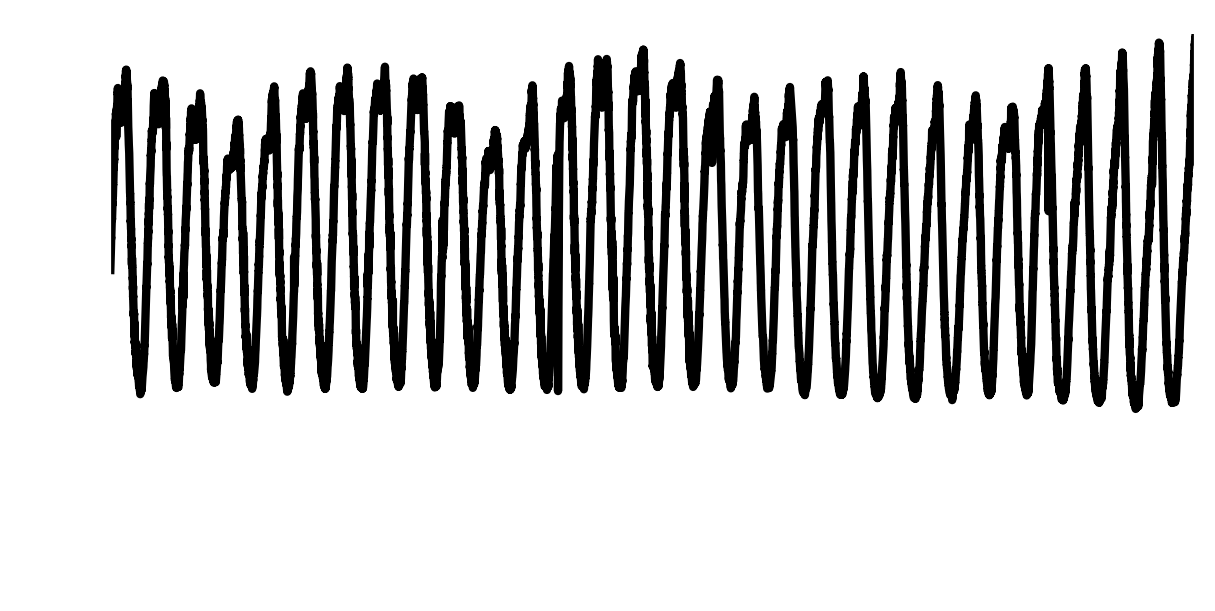

In [107]:
# df['timestamp'] = pd.to_datetime(df['timestamp'])
df.columns = ['Player Count', 'Time']

params = {"ytick.color": "w",
            "xtick.color": "w",
            "axes.labelcolor": "w",
            "axes.edgecolor": "w"}
plt.rcParams.update(params)
fig = plt.figure(figsize=(7, 3), dpi=200)
ax = plt.axes()
plt.margins(x=0)

scatter = False
if scatter:
    plt.scatter(x=df['Time'], y=df['Player Count'], alpha=.1, s=.5, c='#000')
else:
    df.plot(ax=ax, x='Time', y='Player Count', linewidth=3.0, c='#000')
    ax.get_legend().remove()

# ax.get_xaxis().set_visible(False)
# ax.get_legend().remove()

plt.savefig('graph.png', transparent=True, bbox_inches='tight')
plt.draw()